# Univariate Optimization

In [1]:
from scipy import optimize

import matplotlib.pyplot as plt
import numpy as np
import sympy

sympy.init_printing()

> As an example for illustrating these techniques, consider the following classic
optimization problem: Minimize the area of a cylinder with unit volume. Here, suitable
variables are the radius r and height h of the cylinder, and the objective function is
f ([r, h]) = 2πr2+2πrh, subject to the equality constraint g([r, h]) = πr2h − 1 = 0. As this
problem is formulated here, it is a two-dimensional optimization problem with an
equality constraint

In [2]:
r, h = sympy.symbols("r, h")

Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r**2 * h

Area, Volume

#### equality constraint $g([r, h]) = πr2h − 1 = 0$

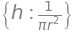

In [9]:
# Volume equals to 1, solve the equation
h_r = sympy.solve(Volume - 1)[0]
h_r

In [18]:
# Substitute h_r to h
Area_r = Area.subs(h_r)
Area_r

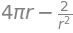

In [13]:
# Take the derivative
Area_r_diff = Area_r.diff(r)
Area_r_diff

In [17]:
# solution for radius
rsol = sympy.solve(Area_r_diff)[0]
rsol

In [16]:
# numerical result
rsol.evalf()

> Now verify that the second derivative is positive and that rsol corresponds to a
minimum

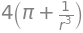

In [20]:
r_diff2 = Area_r.diff(r, 2)
r_diff2

In [24]:
r_diff2_val = r_diff2.subs(r, rsol)
r_diff2_val

In [27]:
Area_r.subs(r, rsol)

_.evalf()

> To solve the optimization problem, we then pass this function to,
for example, optimize.brent. Optionally we can use the brack keyword argument to
specify a starting interval for the algorithm

In [31]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r

arg_min = optimize.brent(f, brack=(0.1, 4))
arg_min

In [32]:
f(arg_min)

> Instead of calling optimize.brent directly, we could use the generic interface
for scalar minimization problems optimize.minimize_scalar. Note that to specify a
starting interval in this case, we must use the bracket keyword argument

In [34]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

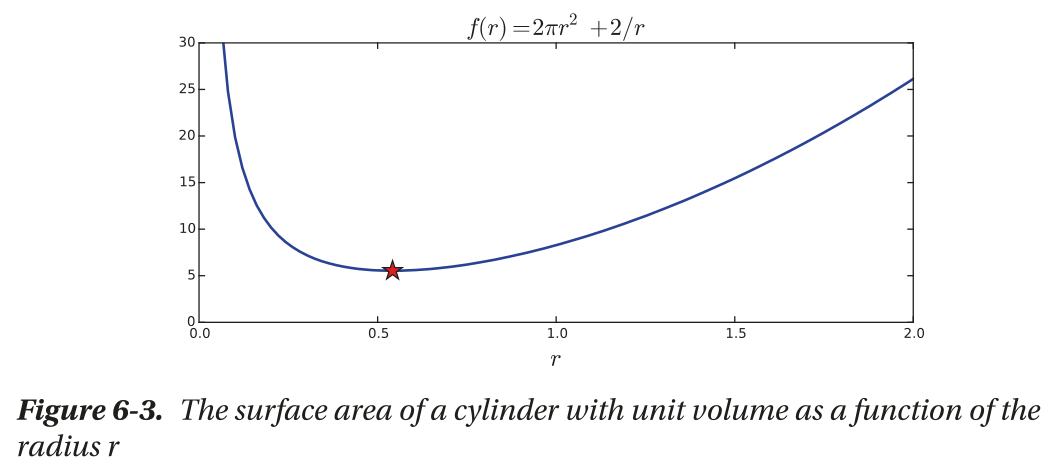